In [1]:
# Assignment 1
# Henry Crawford


In [2]:
#import all required libraries etc

from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import itertools

In [3]:
#run stepwise regression function
#NOTE: stepwise_selection function used from: 
#https://datascience.stackexchange.com/questions/24405/how-to-do-stepwise-regression-using-sklearn/24447#24447

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
#         print(excluded)
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
#             print(included, new_column)
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = excluded[new_pval.argmin()]
#             print(best_feature, included)
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(X.columns[worst_feature], worst_pval))
        if not changed:
            break
    return included

In [4]:
data = pd.read_csv('corr.csv')
#data = pd.read_csv('corr-nooutlier.csv') # data with outliers removed
data.head()

,x,x2,x3,y,y2,y3
0,-0.523382,-0.523382,-0.523382,-1.328587,-1.328587,-1.328587
1,-0.883960,-0.883960,-0.883960,-1.223816,-1.223816,-1.223816
2,-1.329755,-1.329755,-1.329755,-0.009134,-0.009134,-0.009134
3,-0.444216,-0.444216,-0.444216,-1.253460,-1.253460,-1.253460
4,-1.013937,-1.013937,18.986063,-2.043557,-22.043557,-22.043557


In [5]:
# calculate pearsons correlation coefficient for each xy pair

#np.correlation coefficient
r_xy = np.corrcoef(data['x'], data['y'])
r_xys = round(r_xy[0,1], 3)
print(r_xys) # prints topright value of the pearson correlation matrix, rounded to 3 sig figs


r_x2y2 = np.corrcoef(data['x2'], data['y3'])
r_x2y2s = round(r_x2y2[0,1], 3)
print(r_x2y2s)

r_x3y3 = np.corrcoef(data['x3'], data['y3'])
r_x3y3s = round(r_x3y3[0,1], 2)
print(r_x3y3s)


0.58
0.34
-0.9


In [6]:
# table of pearsons coefficients
# initialize list of lists
table_dat = [['x', 'y', r_xys], ['x2', 'y2', r_x2y2s], ['x3', 'y3', r_x3y3s]]
 
# Create the pandas DataFrame
table = pd.DataFrame(table_dat, columns = ['x', 'y', 'Pearsons'])
 
# print dataframe.
table

,x,y,Pearsons
0,x,y,0.58
1,x2,y2,0.34
2,x3,y3,-0.90


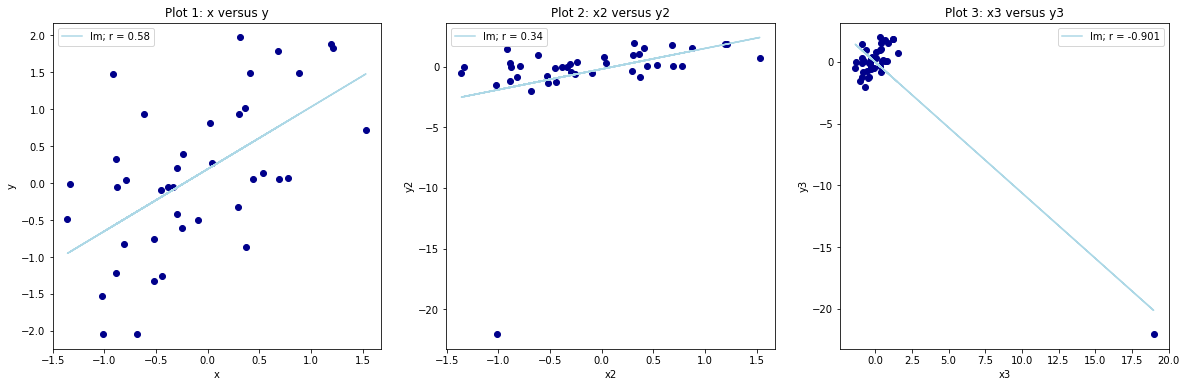

In [7]:
# plot each data set w/ linear regression line

plt.figure(figsize=(20,6))

# fit linear regression and plot

# xy
x_dat = data['x']
y_dat = data['y']
p = np.polyfit(x_dat, y_dat, 1)

plt.subplot(1,3,1)
plt.scatter(x_dat, y_dat, c = 'darkblue')
plt.plot(x_dat,np.poly1d(p)(x_dat), c = 'lightblue', label = f"lm; r = {round(r_xy[0,1], 3)}")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot 1: x versus y')
plt.legend()

# x2y2
x_dat = data['x2']
y_dat = data['y2']
p = np.polyfit(x_dat, y_dat, 1)

plt.subplot(1,3,2)
plt.scatter(x_dat, y_dat, c = 'darkblue')
plt.plot(x_dat,np.poly1d(p)(x_dat),  c = 'lightblue', label = f"lm; r = {round(r_x2y2[0,1], 3)}")
plt.xlabel('x2')
plt.ylabel('y2')
plt.title('Plot 2: x2 versus y2')
plt.legend()

# x3y3
x_dat = data['x3']
y_dat = data['y3']
p = np.polyfit(x_dat, y_dat, 1)

plt.subplot(1,3,3)
plt.scatter(x_dat, y_dat, c = 'darkblue')
plt.plot(x_dat,np.poly1d(p)(x_dat), c = 'lightblue', label = f"lm; r = {round(r_x3y3[0,1], 3)}")
plt.xlabel('x3')
plt.ylabel('y3')
plt.title('Plot 3: x3 versus y3')
plt.legend()


In [8]:
# Q1a. 
# Plot 1: 



In [9]:
data = pd.read_csv('MLR.csv')
#data = pd.read_csv('corr-nooutlier.csv') # data with outliers removed
data.head()

,x1,x2,x3,x4,x5,x6,y
0,10.009056,-0.119002,-0.732425,-0.593719,0.686548,107.818385,30.951089
1,10.004081,0.994384,0.869795,0.116066,-0.270926,-83.211405,13.460466
2,10.009078,0.124936,-0.964920,0.421480,-0.442516,62.415667,24.614109
3,10.001963,-0.068292,-0.877812,-0.037671,-0.495842,122.721405,27.513114
4,10.006815,-0.161981,0.014581,0.457926,-0.515236,-18.979621,15.077882


In [10]:
#normalize data and check it out
xdata = data[["x1","x2", "x3", "x4", "x5", "x6"]]
X = (xdata - xdata.mean())/xdata.std()
X.head()

,x1,x2,x3,x4,x5,x6
0,1.596349,-0.350869,-1.048438,-1.280976,1.298979,1.571710
1,0.684715,1.662877,1.494450,0.121394,-0.237130,-1.076593
2,1.600365,0.090333,-1.417432,0.724822,-0.512417,0.942278
3,0.296547,-0.259153,-1.279183,-0.182355,-0.597971,1.778315
4,1.185692,-0.428605,0.137137,0.796829,-0.629084,-0.186129


In [11]:
Y = data[["y"]]
Y.head()

,y
0,30.951089
1,13.460466
2,24.614109
3,27.513114
4,15.077882


Text(0.5, 1.0, 'MLR data')

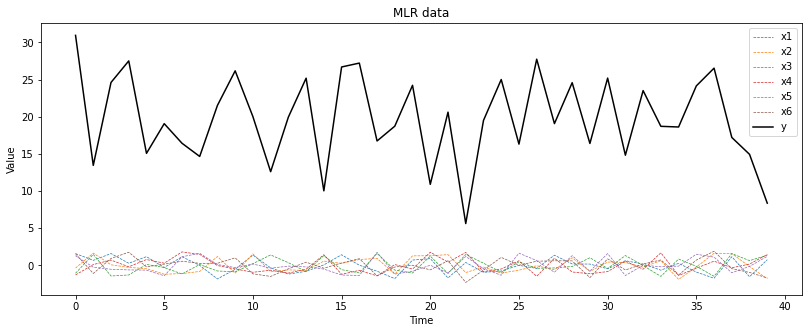

In [12]:
#visualize normalization 

plt.figure(figsize=[30,5])

plt.subplot(1,2,1)
plt.plot(X, '--', linewidth = 0.7)
plt.plot(Y, color = 'black')
plt.legend(X + Y)
plt.ylabel('Value')
plt.xlabel('Time')
plt.title('MLR data')


In [13]:
#apply MLR on X and Y to see if this method can recover the known coefficients

lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,Y)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,Y) #R-squared value from MLR model

print('MLR results:')
print('a0 = ' + str(intercept_MLR))
print('a1 = ' + str(coef_MLR[0,0]))
print('a2 = ' + str(coef_MLR[0,1]))
print('a3 = ' + str(coef_MLR[0,2]))
print('a4 = ' + str(coef_MLR[0,3]))
print('a5 = ' + str(coef_MLR[0,4]))
print('a6 = ' + str(coef_MLR[0,5]))


MLR results:
a0 = [19.72217152]
a1 = 0.45856155675842575
a2 = 0.2176155676183905
a3 = -2.107375255413166
a4 = -3.3863144555123337
a5 = 0.11391349361393784
a6 = 2.762332882745583


In [14]:
R2_MLR

0.9802415713082822

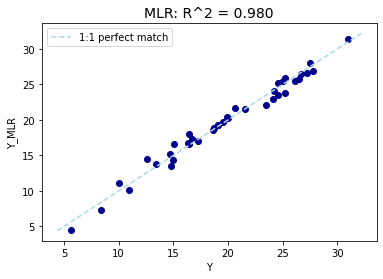

In [15]:
fs = 14
ax1 = plt.subplot(111)
ax1.scatter(Y,ypred_MLR, c = 'darkblue')
l1 = np.min(ax1.get_xlim())
l2 = np.max(ax1.get_xlim())
ax1.plot([l1,l2], [l1,l2], ls="--", c="lightblue", label = "1:1 perfect match")
plt.xlabel('Y')
plt.ylabel('Y_MLR')
plt.title('MLR: R^2 = ' + str(R2_MLR)[:5], fontsize = fs)
plt.legend()

plt.show()

In [16]:
#now, use stepwise regression to find which predictors to use

result = stepwise_selection(X, Y)

print('resulting features:')
print(result)

Add  x6                             with p-value 1.01879e-09
Add  x4                             with p-value 3.45675e-17
Add  x3                             with p-value 7.44399e-07
Add  x1                             with p-value 0.00532758
resulting features:
['x6', 'x4', 'x3', 'x1']


C:\Users\htccr\AppData\Local\Temp/ipykernel_40344/1278265183.py:31: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
C:\Anaconda\envs\env_eosc510\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda\envs\env_eosc510\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda\envs\env_eosc510\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Anaconda\envs\env_eosc510\li

In [17]:
#do MLR using predictors chosen from stepwise regression
lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],Y)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],Y) #R-squared value from MLR model

print('stepwise MLR results:')
print('a0 = ' + str(intercept_step))
print('a6 = ' + str(coef_step[0,0]))
print('a4 = ' + str(coef_step[0,1]))
print('a3 = ' + str(coef_step[0,2]))
print('a1 = ' + str(coef_step[0,3]))

stepwise MLR results:
a0 = [19.72217152]
a6 = 2.8962539950672355
a4 = -3.387330333847407
a3 = -1.9858815897037418
a1 = 0.4455865351285706


In [18]:
R2_step

0.9787250523829699

In [19]:
#which predictor is most important?
print('Most important variable index for stepwise: ', np.argmax(np.abs(coef_step)))

print('Most important variable for stepwise: ', result[np.argmax(np.abs(coef_step))])

print(result)
print(np.abs(coef_step))

Most important variable index for stepwise:  1
Most important variable for stepwise:  x4
['x6', 'x4', 'x3', 'x1']
[[2.896254   3.38733033 1.98588159 0.44558654]]


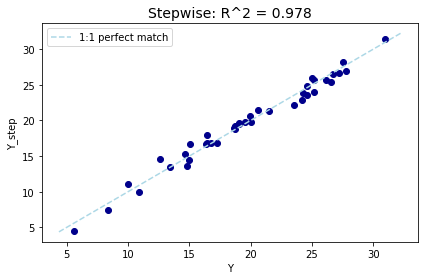

In [22]:
ax2 = plt.subplot(111)
ax2.scatter(Y,ypred_step, c = 'darkblue')
l1 = np.min(ax2.get_xlim())
l2 = np.max(ax2.get_xlim())
ax2.plot([l1,l2], [l1,l2], ls="--", c="lightblue", label = "1:1 perfect match")
plt.xlabel('Y')
plt.ylabel('Y_step')
plt.legend()
plt.title('Stepwise: R^2 = ' + str(R2_step)[:5], fontsize = fs)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'MLR data')

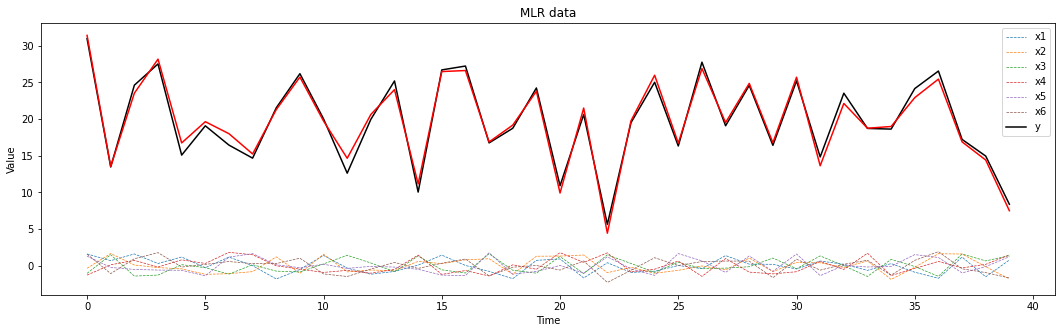

In [21]:
#visualize model (ADD y pred to legend!)

plt.figure(figsize=[40,5])

plt.subplot(1,2,1)
plt.plot(X, '--', linewidth = 0.7)
plt.plot(Y, color = 'black')
plt.plot(ypred_step, color = 'red')
plt.legend(X + Y)
plt.ylabel('Value')
plt.xlabel('Time')
plt.title('MLR data')